# [ATM 623: Climate Modeling](../index.ipynb)

[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany

## Assignment 1: Feedback in the zero-dimensional EBM

- Make a copy or branch of this notebook file so you can add your answer in additional cells.
- Complete all the problems below. 
- For each problem, show your code and calculations.
- Feel free to include comments in your code to explain your method as necessary.
- Submit your solutions in a single Jupyter notebook that contains your text, your code, and your figures.
- *Try to make sure that your notebook runs cleanly from start to finish.*
- Save your notebook as `[your last name].ipynb`, e.g. my notebook should be called `Rose.ipynb`.  *This makes it easier for me when I collect all your answers*
- Submit your answers by email before class on **Thursday February 9 2017**.

### Reading assignment

Read this review paper:

[Roe, Gerard (2009): Feedbacks, Timescales, and Seeing Red. Annu. Rev. Earth Planet. Sci. 37:93–115. doi:10.1146/annurev.earth.061008.134734](http://annualreviews.org/doi/abs/10.1146/annurev.earth.061008.134734)

Write at least one paragraph commentary on this article. What did you find most interesting or surprising? You are also welcome to offer criticisms or rebuttals to anything in the article.

*Your commentary here*

### Question 1: Radiative forcing in the zero-dimensional energy balance model

In lecture we defined a zero-dimensional energy balance model for the global mean surface temperature $T$ as follows

$$C  \frac{dT}{dt} =(1-α)Q- OLR(T)$$

$$OLR= \sigma (\beta T)^4$$

where we defined these terms:
- $C$ is a heat capacity for the atmosphere-ocean column
- $\alpha$ is the global mean planetary albedo
- $\sigma = 5.67 \times 10^{-8}$ W m$^{-2}$ K$^{-4}$ is the Stefan-Boltzmann constant
- $\beta$ is our parameter for the proportionality between surface temperature and emission temperature
- $Q$ is the global-mean incoming solar radiation.

Following our course notes, set up values for all parameters so that the model reproduces the observed global average surface temperature $T=288$ K at equilibrium given the observed top-of-atmosphere shortwave and longwave radiative fluxes from the Trenberth and Fasullo figure from [Lecture 1](../Lectures/Lecture01 -- Planetary energy budget.ipynb). Suppose (for now) that the planetary albedo $\alpha$ is fixed at its observed value.

Doubling atmospheric CO$_2$ makes the atmosphere more opaque to longwave radiation. Suppose that we can represent this in the EBM as a 0.5 % decrease in the value of $\beta$.

(a) Calculate the radiative forcing $\Delta R$ in this model due to a doubling of CO$_2$.

(b) Calculate the no-feedback equilibrium response $\Delta T_0$.

(c) Using numerical timestepping, make a well-labeled graph of the timeseries of temperature $T(t)$ as it adjusts from initial temperature 288 K to its new equilibrium.

3.291931041441643
1.0127455613875613
289.6275047374125
289.0127455613876


Text(0,0.5,'Global mean surface temperature (K)')

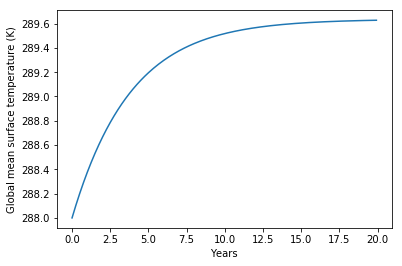

In [38]:
import numpy
C=4e8
Q = 341.3  #  global mean insolation in W/m2
alpha = 101.9 / Q    #  observed planetary albedo
sigma=5.67e-8 #  Stefan-Boltzmann constant in W/m2/K4
Te=((1-alpha)*Q/sigma)**0.25 #  Emission temperature (definition)
Tsbar = 288.  # global mean surface temperature in K
beta = Te / Tsbar   #  Calculate value of beta from observations

#for question (a)
beta_2xco2=beta-0.5/100
deltaR_2xco2= (sigma*((beta*Te)**4)) - (sigma*((beta_2xco2*Te)**4))
print(deltaR_2xco2)

#for question (b)
lambda_0 = 4 * sigma * beta**4 * Tsbar**3
delta_T0 = deltaR_2xco2/lambda_0
print(delta_T0)


#for question (c)
T_2xco2=Tsbar

# absorbed solar is a constant in this model
ASR = (1-alpha)*Q
# but the longwave depends on temperature... define a function for this
def OLR(Ts):
    return sigma*(beta_2xco2*Ts)**4
\
def cal_T_trend(T0,time_step):
    return T0 + (ASR - OLR(T0))*time_step/C

second_per_year=24*60*60*365
t_series = np.arange(0,second_per_year*20,second_per_year/12)
time_step = t_series[1]-t_series[0]

T_response = np.zeros(len(t_series))

T_response[0] = T_2xco2

for i in np.arange(1,len(t_series)):
    T_response[i] = cal_T_trend(T_response[i-1],time_step)

print(T_response[-1])
print(T_2xco2+delta_T0)
plt.plot(t_series/second_per_year,T_response)
plt.xlabel('Years')
plt.ylabel('Global mean surface temperature (K)')


### Question 2: Water vapor feedback in the EBM

In reality, the longwave opacity increases further as the planet warms because the atmosphere tends to get moister and water vapor provides an additional greenhouse effect.

Let's parameterize the water vapor feedback in the EBM through a formula

$$ \beta(T) = \beta_0 - \frac{T - 288 \text{ K}}{680\text{ K}} $$

where $\beta_0$ is the value at $T = 288$ K.

(a) Implement this formula in a Python function.

As in Question 1, use numerical timestepping to investigate the adjustment of the EBM to its new equilibrium temperature after doubling CO$_2$. 

Make a well-labeled graph to compare the timeseries $T(t)$ with and without the water vapor feedback. Comment on the differences in climate sensitivity and in adjustment time.

(b) Calculate the **system gain** $g$ due to the water vapor feedback and the corresponding **feedback amount** $f_w$.

288.00000000001165
[298.         297.88677451 297.77482146 ... 288.         288.
 288.        ]


Text(0,0.5,'Global mean surface temperature (K)')

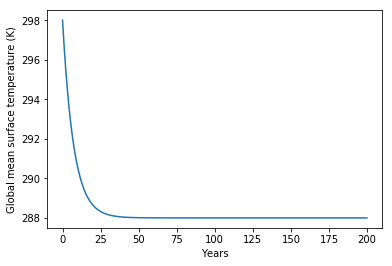

In [62]:
def beta_T(T):
    beta_t=beta-(T-288)/680
    return beta_t

# absorbed solar is a constant in this model
ASR = (1-alpha)*Q
# but the longwave depends on temperature... define a function for this
def OLR(Ts):
    return sigma*(beta_T(Ts)*Ts)**4

def cal_T_trend(T0,time_step):
    return T0 + (ASR - OLR(T0))*time_step/C

second_per_year=24*60*60*365
t_series = np.arange(0,second_per_year*200,second_per_year/12)
time_step = t_series[1]-t_series[0]

T_response = np.zeros(len(t_series))

T_response[0] = Tsbar+10

for i in np.arange(1,len(t_series)):
    T_response[i] = cal_T_trend(T_response[i-1],time_step)

print(T_response[-1])
print(T_response)
plt.plot(t_series/second_per_year,T_response)
plt.xlabel('Years')
plt.ylabel('Global mean surface temperature (K)')


    

### Question 3: Albedo feedback in the EBM

For this exercise, we will introduce a new physical process into our model by letting the planetary albedo depend on temperature. The idea is that a warmer planet has less ice and snow at the surface, and thus a lower planetary albedo.

Represent the ice-albedo feedback through the following formula:

$$ \alpha(T) = \left\{ \begin{array}{ccc}
\alpha_i &   & T \le T_i \\
\alpha_o + (\alpha_i-\alpha_o) \frac{(T-T_o)^2}{(T_i-T_o)^2} &   & T_i < T < T_o \\
\alpha_o &   & T \ge T_o \end{array} \right\}$$

with the following parameter values:

- $\alpha_o = 0.289$ is the albedo of a warm, ice-free planet
- $\alpha_i = 0.7$ is the albedo of a very cold, completely ice-covered planet
- $T_o = 293$ K is the threshold temperature above which our model assumes the planet is ice-free
- $T_i = 260$ K is the threshold temperature below which our model assumes the planet is completely ice covered. 

For intermediate temperature, this formula gives a smooth variation in albedo with global mean temperature. It is tuned to reproduce the observed albedo $\alpha = 0.299$ for $T = 288$ K. 

(a):

- Define a Python function that implements the above albedo formula. *There is definitely more than one way to do it. It doesn't matter how you do it as long as it works!*
-  Use your function to calculate albedos for a wide range on planetary temperature (e.g. from $T=250$ K to $T=300$ K.)
- Present your results (albedo as a function of global mean temperature) in a nicely labeled figure.

(b):

Repeat question 2(a), this time including the albedo feedback but ignoring the water vapor feedback (i.e. $\beta$ does not decrease with temperature). Again, use numerical timestepping to calculate the new equilibrium temperature after the increase in greenhouse gases, including the albedo feedback. Show your code, and make sure that you iterate enough times to ensure your solution is very very close to equilibrium. Make a graph comparing the timeseries in the three model versions used so far.

(c): 

Repeat question 2(b), calculating the **system gain** $g$ and **feedback amount** $f_i$ associated with this albedo feedback.

Text(0,0.5,'Global mean surface albedo')

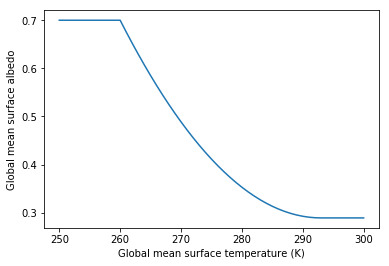

In [53]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
def alpha_T(T):
    alpha_o=0.289
    aphpha_i=0.7
    To=293
    Ti = 260
    if (T <= Ti):
        alpha_t=aphpha_i
    elif (T >= To):
        alpha_t=alpha_o
    else:
        alpha_t=alpha_o+(aphpha_i-alpha_o)*((T-To)**2/(Ti-To)**2)
       
    return alpha_t

T_range=np.arange(250,300+1)
alpha_range= np.zeros(len(T_range)) #[] #np.zeros_like(T_range)

for i in np.arange(0,len(T_range)):
    a=alpha_T(T_range[i])
    alpha_range[i] = a

plt.plot(T_range, alpha_range) 
plt.xlabel('Global mean surface temperature (K)')
plt.ylabel('Global mean surface albedo')
    



[278.         278.03836864 278.07695613 ... 288.02159021 288.02159021
 288.02159021]


Text(0,0.5,'Global mean surface temperature (K)')

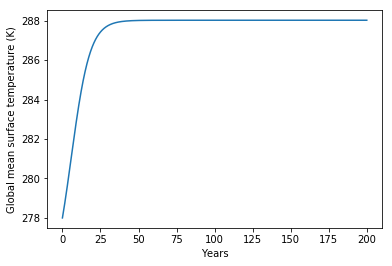

In [65]:
#for question (b)
%matplotlib inline
def ASR(Ts):
    return (1-alpha_T(Ts))*Q
# but the longwave depends on temperature... define a function for this
def OLR(Ts):
    return sigma*(beta*Ts)**4

def cal_T_trend(T0,time_step):
    return T0 + (ASR(T0) - OLR(T0))*time_step/C

second_per_year=24*60*60*365
t_series = np.arange(0,second_per_year*200,second_per_year/12)
time_step = t_series[1]-t_series[0]

T_response = np.zeros(len(t_series))

T_response[0] = Tsbar-10

for i in np.arange(1,len(t_series)):
    T_response[i] = cal_T_trend(T_response[i-1],time_step)

print(T_response)

plt.plot(t_series/second_per_year,T_response)
plt.xlabel('Years')
plt.ylabel('Global mean surface temperature (K)')

In [56]:
alpha_T(288)
cal_T_trend(288,time_step)
time_step

2628000.0

### Question 4: Combining feedbacks

Repeat 3(b) and 3(c) but this time including *both* the water vapor and albedo feedback processes in the EBM.

Comment on the following:

- Are the feedback amounts additive? (in other words, do you find the $f = f_i + f_w$?
- Are the system gains additive?
- How does the feedback amount change the timescale of adjustment?

### Question 5: Uncertainty in feedback and response

Inspired by Figure 5 of the paper by Gerard Roe, show that a *small uncertainty in the magnitude of the water vapor feedback* translates to a *larger uncertainty* in climate sensitivity if the model also includes the albedo feedback, even if there is no uncertainty in the albedo feedback itself.

Present your arguments and results any way you see fit, but make sure your method and your code are clear.

<div class="alert alert-success">
[Back to ATM 623 notebook home](../index.ipynb)
</div>

____________

## Credits

The author of this notebook is [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It was developed in support of [ATM 623: Climate Modeling](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/), a graduate-level course in the [Department of Atmospheric and Envionmental Sciences](http://www.albany.edu/atmos/index.php)

Development of these notes and the [climlab software](https://github.com/brian-rose/climlab) is partially supported by the National Science Foundation under award AGS-1455071 to Brian Rose. Any opinions, findings, conclusions or recommendations expressed here are mine and do not necessarily reflect the views of the National Science Foundation.
____________